In [40]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
df=pd.read_csv(r"C:\Users\nice\Desktop\m\data\model Data.csv")

In [42]:
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,service_plus
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,2,29.85,29.85,0,1
1,1,1,0,0,0,34,1,0,0,1,...,0,0,0,1,0,3,56.95,1889.50,0,1
2,2,1,0,0,0,2,1,0,0,1,...,0,0,0,0,1,3,53.85,108.15,1,1
3,3,1,0,0,0,45,0,0,0,1,...,1,0,0,1,0,0,42.30,1840.75,0,1
4,4,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,1,0,1,1,24,1,1,0,1,...,1,1,1,1,1,3,84.80,1990.50,0,1
7028,7039,0,0,1,1,72,1,1,1,0,...,0,1,1,1,1,1,103.20,7362.90,0,1
7029,7040,0,0,1,1,11,0,0,0,1,...,0,0,0,0,1,2,29.60,346.45,0,1
7030,7041,1,1,1,0,4,1,1,1,0,...,0,0,0,0,1,3,74.40,306.60,1,0


In [43]:
x=df.drop(columns=["Churn","Unnamed: 0"])
y=df["Churn"]
x_trian,x_test,y_trian,y_test=train_test_split(x,y,random_state=42,train_size=.8,test_size=.2)

In [44]:
model_log=LogisticRegression(solver="liblinear",max_iter=100,class_weight="balanced")
model_log.fit(x_trian,y_trian)
y_pred_log=model_log.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7370291400142146
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [45]:
a=model_log.score(x_test,y_test)
a

0.7370291400142146

<Axes: >

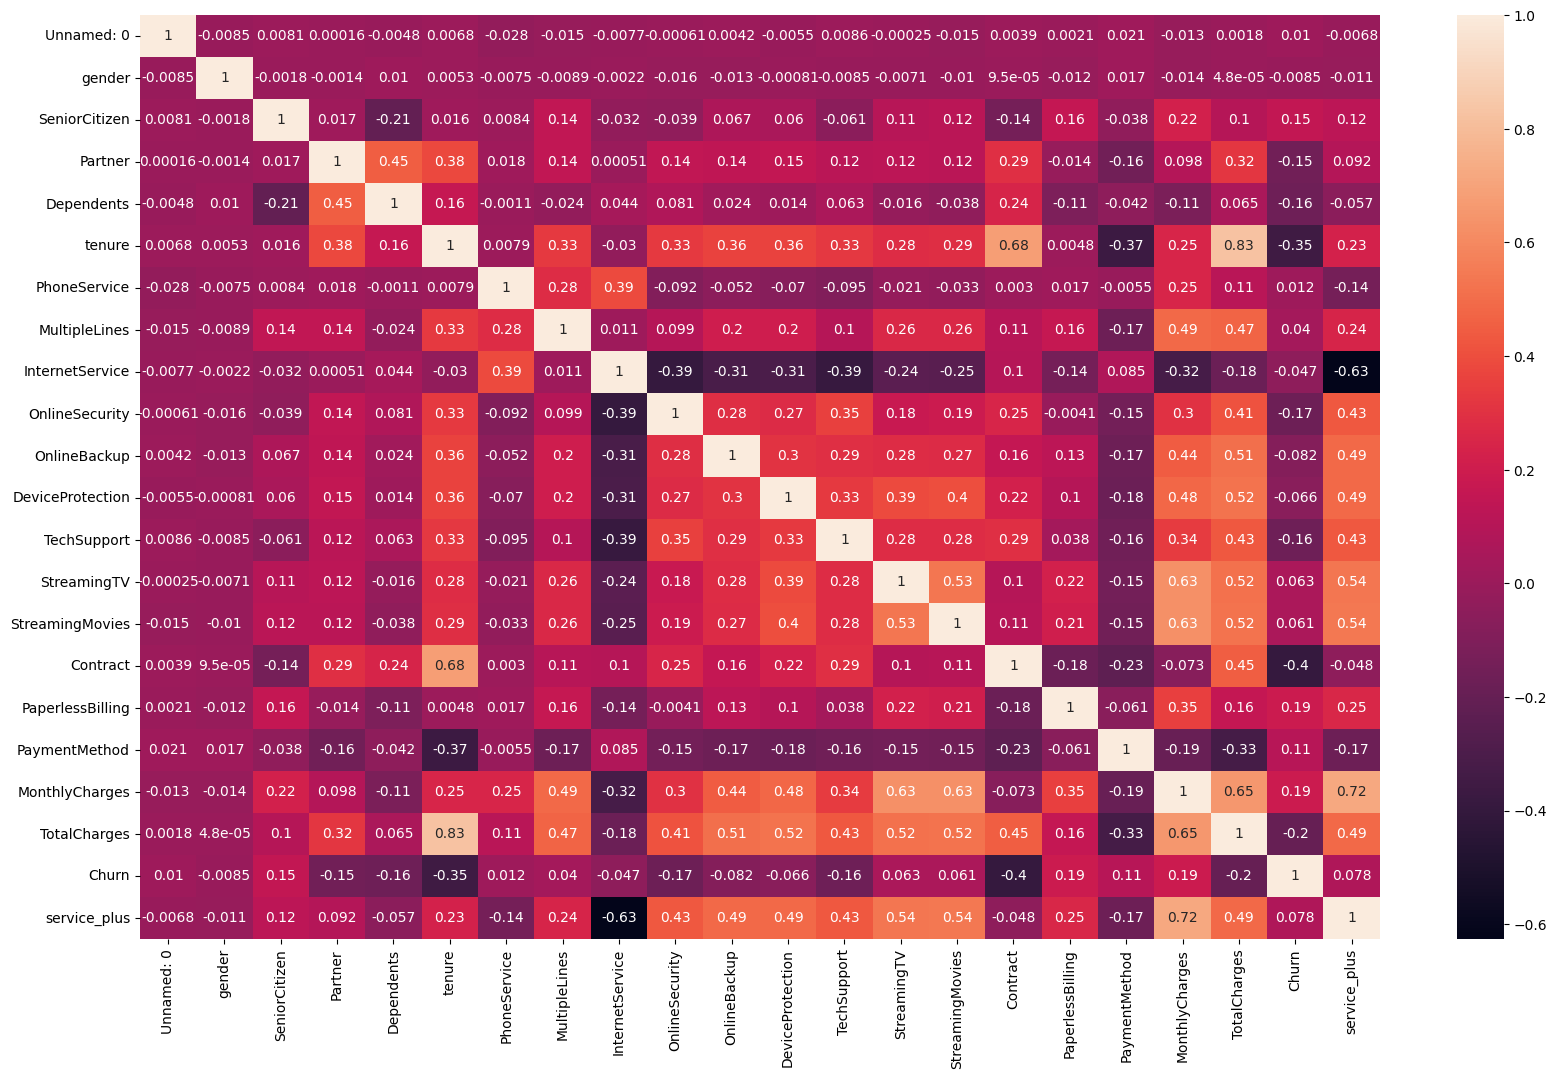

In [46]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)